## Defining the Polynomial

In [1]:
var('x, a0,a1,a2,a3,a4,a5,a6')
x = polygen(ZZ) 
eq = a0 + a1*x + a2*x^2 + a3*x^3 + a4*x^4 + a5*x^5 + a6*x^6

In [2]:
eq.show()

a6*x^6 + a5*x^5 + a4*x^4 + a3*x^3 + a2*x^2 + a1*x + a0

In [3]:
eq1 = eq.subs([a0==1],[a1==-5],[a2==0],[a3==0],[a4==0],[a5==0],[a6==1])
eq1.show()

x^6 - 5*x + 1

### Solving for the given polynomial

Although the generalized solution to $ a_0+a_1x+a_2x^2+a_3x^3+a_4x^4+a_5x^5+a_6x^6 = 0 $ does not exist, it is certainly possible to find the roots given the co-efficients.

In [4]:
x = polygen(ZZ)
eq1 = x^6-5*x+1 
eq1.roots(ring=CIF)

[(0.2000128049178756?, 1),
 (1.335687296057259?, 1),
 (-1.153570400482396? - 0.812646548862507?*I, 1),
 (-1.153570400482396? + 0.812646548862507?*I, 1),
 (0.385720349994829? - 1.315729182385585?*I, 1),
 (0.385720349994829? + 1.315729182385585?*I, 1)]

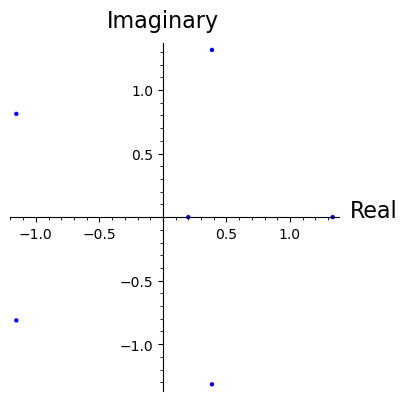

In [5]:
p = Graphics()
for i in eq1.roots(ring=CIF):
    p+= i[0].plot()
    
p.show(axes_labels=['Real','Imaginary'])
p.save("Roots.png")

## Enclosing Circle

Iterating through two and three points at a time and finding if the circumcircle encompasses all other points

In [6]:
# Inspired from GeeksforGeeks

INF = 10**18

def dist(a, b):
    # Returns distance between two points
    return sqrt( (a[0]-b[0])**2 + (a[1]-b[1])**2)


def is_inside(c, p):
    # Checks if point p lies inside circle
    return dist(c[0], p) <= c[1]


def get_circle_center(bx, by, cx, cy):
    # Returns the centre of circumcircle of A, B, C
    B = bx * bx + by * by
    C = cx * cx + cy * cy
    D = bx * cy - by * cx
    return [(cy * B - by * C) / (2 * D), (bx * C - cx * B) / (2 * D) ]

def circle_from_3(A, B, C):
    I = get_circle_center(B[0] - A[0], B[1] - A[1], C[0] - A[0], C[1] - A[1])
    I[0] += A[0]
    I[1] += A[1]
    return [I, dist(I, A)]

def circle_from_2(A, B):
    C = [ (A[0] + B[0]) / 2.0, (A[1] + B[1]) / 2.0]
    return [C, dist(A, B) / 2.0]

def is_valid_circle(c, P):
    for p in P:
        if (is_inside(c, p) == False):
            return False
    return True

def minimum_enclosing_circle(P):
    # Iterates through all possible circles and finds the Enclosing Circle
    
    n = len(P)
    if (n == 0):
        return [[0, 0], 0]
    if (n == 1):
        return [P[0], 0]

    mec = [[0, 0], INF]

    for i in range(n):
        for j in range(i + 1, n):
            tmp = circle_from_2(P[i], P[j])
            if (tmp[1] < mec[1] and is_valid_circle(tmp, P)):
                mec = tmp
                
    for i in range(n):
        for j in range(i + 1, n):
            for k in range(j + 1, n):
                tmp = circle_from_3(P[i], P[j], P[k])
                
                if (tmp[1] < mec[1] and is_valid_circle(tmp, P)):
                    mec = tmp
    return mec

def convert_to_points(z):
    points = []
    for point in z:
        points.append([point[0].real().n(digits=2), point[0].imag().n(digits=2)])
    return points

In [7]:
root = eq1.roots(ring=CIF)
points = convert_to_points(root)
mec = minimum_enclosing_circle(points)

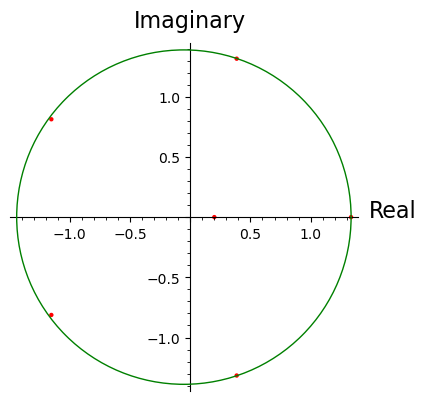

In [8]:
p = Graphics()
for i in eq1.roots(ring=CIF):
    p+= i[0].plot(color='red')
    
p+= circle(mec[0], mec[1], color='green')
    
p.show(axes_labels=['Real','Imaginary'])
p.save("Enclosed.png")